<a href="https://colab.research.google.com/github/sanskritisawant/4-bit-comparator-verilog/blob/master/assignment_4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#####SANSKRITI ML ASSIGNMENT 4 Q1
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
import matplotlib.pyplot as plt          
%matplotlib inline

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [ ]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

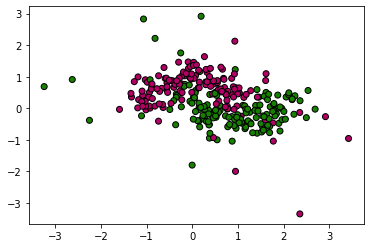

In [ ]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

Best C values: 
[1.0, 10.0, 100.0, 10000.0]


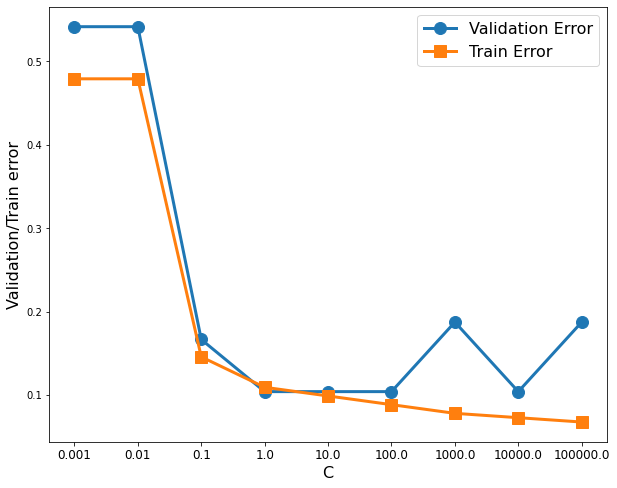

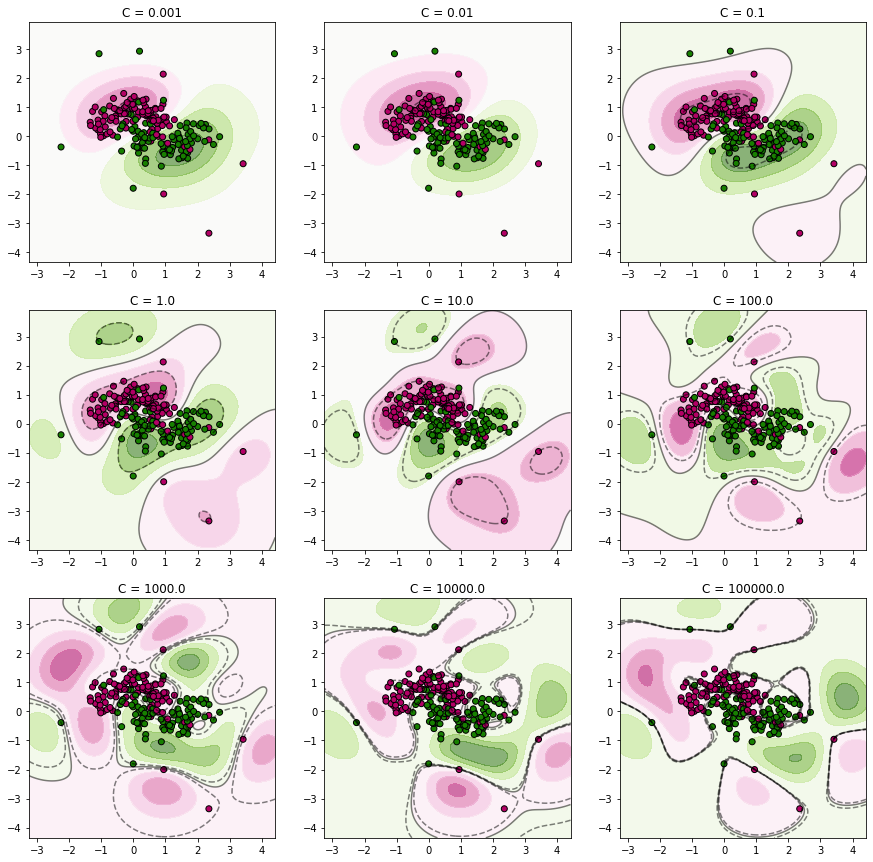

In [ ]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
####SANSKRITI ML ASSIGNMENT 4 Q1A
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)
cvalues=list(C_values)
models = dict()
trnErr = dict()
valErr = dict()

for idx,C in enumerate(C_values):
    clf = SVC(C = C,gamma='scale',kernel='rbf',random_state=0)
    clf.fit(X_trn, y_trn)
    models[C]=clf
    y_trnpred = clf.predict(X_trn)
    y_valpred = clf.predict(X_val)
    trnErr[idx]=1-accuracy_score(y_trn,y_trnpred)
    valErr[idx]=1-accuracy_score(y_val,y_valpred)


plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ('0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
 
visualize(models, 'C', X_trn, y_trn)

minErr=1
count_minErr=1
bestIndex=[]
for val in valErr:
    if(valErr[val] < minErr ):
        minErr=valErr[val]
        bestIndex.clear()
        bestIndex.append(cvalues[val])
    elif (valErr[val] == minErr ):
        count_minErr +=1
        bestIndex.append(cvalues[val])
        

print('Best C values: ')
print(bestIndex)

In [ ]:
clf = SVC(C = 100,gamma='scale',kernel='rbf')
clf.fit(X_trn, y_trn)
y_tstpred = clf.predict(X_tst)
tstErr=1-accuracy_score(y_tst,y_tstpred)
#tstErr =np.sum(np.power(np.subtract(y_tst,y_tstpred),2))/len(y_tst)
print('Test Error was evaluated to be : '+ str(tstErr))
print(accuracy_score(y_tst,y_tstpred)*100)

Test Error was evaluated to be : 0.15000000000000002
85.0


Best Gamma values: 
[1.0, 10.0]


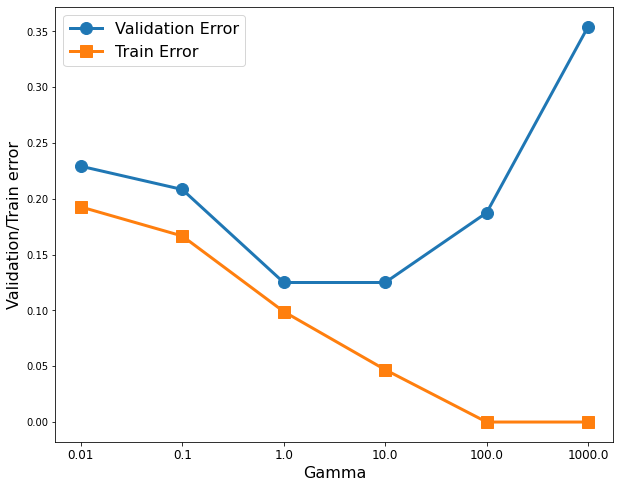

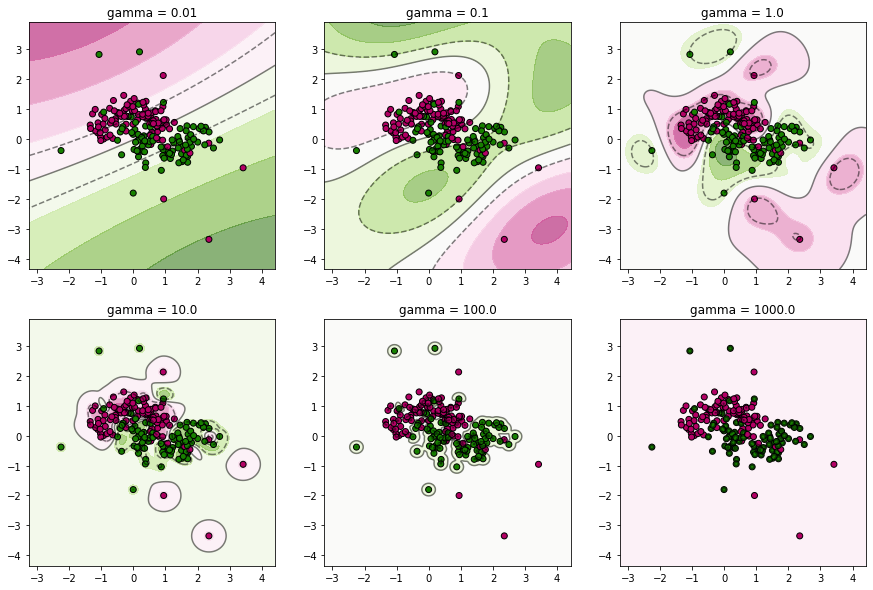

In [ ]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
####SANSKRITI ML ASSIGNMENT 4 Q1B
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
gvalues=list(gamma_values)
models = dict()
trnErr = dict()
valErr = dict()

for idx,G in enumerate(gamma_values):
    clf = SVC(C = 10,gamma=G,kernel='rbf')
    clf.fit(X_trn, y_trn)
    models[G]=clf
    y_trnpred = clf.predict(X_trn)
    y_valpred = clf.predict(X_val)
    trnErr[idx]=1-accuracy_score(y_trn,y_trnpred)
    valErr[idx]=1-accuracy_score(y_val,y_valpred)

plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Gamma', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ( '0.01', '0.1', '1.0', '10.0','100.0','1000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)

  
visualize(models, 'gamma', X_trn, y_trn)

minErr=1
count_minErr=1
bestIndex=[]
for val in valErr:
    if(valErr[val] < minErr ):
        minErr=valErr[val]
        bestIndex.clear()
        bestIndex.append(gvalues[val])
    elif (valErr[val] == minErr ):
        count_minErr +=1
        bestIndex.append(gvalues[val])
        

print('Best Gamma values: ')
print(bestIndex)

In [26]:
clf = SVC(C = 10,gamma=1.0,kernel='rbf')
clf.fit(X_trn, y_trn)
y_tstpred = clf.predict(X_tst)
tstErr = accuracy_score(y_tst,y_tstpred)*100
print('Test Error was evaluated to be : '+ str(tstErr)+' %')

Test Error was evaluated to be : 83.33333333333334 %


In [29]:
####SANSKRITI ML ASSIGNMENT 4 Q2
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
cancer_trn=np.loadtxt(open("wdbc_trn.csv", "rb"), delimiter=",")
Xtrn=cancer_trn[:,1:]
ytrn=cancer_trn[:,0]
cancer_tst=np.loadtxt(open("wdbc_tst.csv", "rb"), delimiter=",")
Xtst=cancer_tst[:,1:]
ytst=cancer_tst[:,0]
cancer_val=np.loadtxt(open("wdbc_val.csv", "rb"), delimiter=",")
Xval=cancer_val[:,1:]
yval=cancer_val[:,0]

In [30]:
Crange = np.arange(-2.0, 5.0, 1.0)
Cvalues = np.power(10.0, Crange)
c_values=list(Cvalues)

grange = np.arange(-3.0, 3.0, 1.0)
gvalues = np.power(10.0, grange)
g_values=list(gvalues)

In [31]:
bestC=[]
bestG=[]
testError=[]
minErr=1
for idx1,i in  enumerate(Cvalues):
    for idx2,j in enumerate(gvalues):
        clf = SVC(C = i,gamma=j,kernel='rbf')
        clf.fit(Xtrn, ytrn)
        y_trnpred=clf.predict(Xtrn)
        y_valpred=clf.predict(Xval)
        y_tstpred=clf.predict(Xtst)
        val_err=1-accuracy_score(yval,y_valpred)
        tst_err=1-accuracy_score(ytst,y_tstpred)
        if(val_err < minErr ):
            minErr=val_err
            bestC.clear()
            bestG.clear()
            testError.clear()
            bestC.append(c_values[idx1])
            bestG.append(g_values[idx2])
            testError.append(tst_err)
        elif (val_err == minErr ):
                bestC.append(c_values[idx1])
                bestG.append(g_values[idx2])
                testError.append(tst_err)
print('Best C')                    
print(bestC)
print('Best G') 
print(bestG)
print('Test Error') 
print(testError)
print('Minimum validation error')
print(minErr)
print('Max Validation accuracy')
print(str((1-minErr)*100))

Best C
[100.0, 1000.0, 10000.0, 10000.0]
Best G
[0.01, 0.01, 0.001, 0.01]
Test Error
[0.034782608695652195, 0.05217391304347829, 0.060869565217391286, 0.05217391304347829]
Minimum validation error
0.02608695652173909
Max Validation accuracy
97.3913043478261


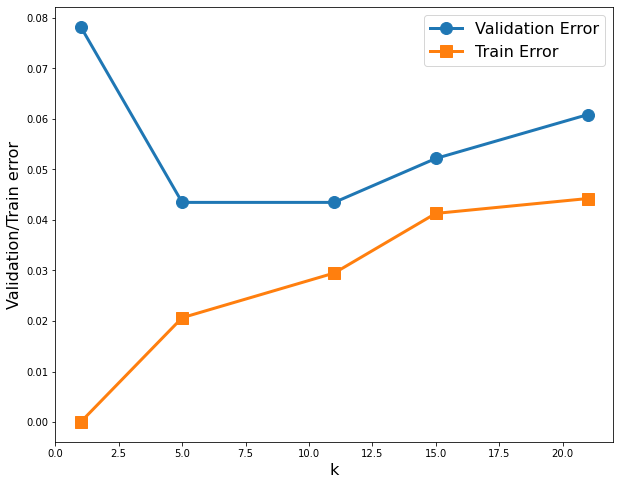

In [32]:
###SANSKRITI ML ASSIGNMENT 4 Q3
k=[1,5,11,15,21]
trnError=[]
valError=[]
for idx,val in enumerate(k):
    neigh = KNeighborsClassifier(n_neighbors=val,algorithm='kd_tree')
    neigh.fit(Xtrn,ytrn) 
    ytrn_pred=neigh.predict(Xtrn)
    yval_pred=neigh.predict(Xval)
    trnError.append(1-accuracy_score(ytrn,ytrn_pred))
    valError.append(1-accuracy_score(yval,yval_pred))
    
plt.figure(figsize=(10,8))
plt.plot(k, valError, marker='o', linewidth=3, markersize=12)
plt.plot(k, trnError, marker='s', linewidth=3, markersize=12)
plt.xlabel('k', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
#plt.xticks(list(trnError.keys()), ( '1', '5', '11', '15','21'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
    

In [33]:
neigh = KNeighborsClassifier(n_neighbors=11,algorithm='kd_tree')
neigh.fit(Xtrn,ytrn) 
ytst_pred=neigh.predict(Xtst)
print('Test Accuracy')
print(accuracy_score(ytst,ytst_pred)*100)

Test Accuracy
97.3913043478261
